### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

In the 'stroopdata' data set, the 'Time' in the 'Congruent' and 'Incongrent' column is the dependent variable and the word collection given in the stroop effect test is the independent variable.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The set of hypothesis for this data set is found to be, 

Null Hypothesis: The mean time difference between the 'Incongruent' and 'Congruent' is less than or equal to zero.
Alternative Hypothesis: The mean time difference between the 'Incongruent' and 'Congruent' is greater than zero.

H_0 = μ_ic - μ_c <= 0;  
H_1 = μ_ic - μ_c > 0; 

where H0 is the Null hypothesis,
      H1 is the alternate hypothesis,
      μ_ic is the Mean of Incongruent and 
      μ_c is the Mean of Congruent.

I perform Paired-T test since the data follows Normal distribution and the person undergoing the stroop effect is same under different conditions.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
import pandas as pd
import numpy as np
import scipy
df= pd.read_csv('stroopdata.csv')
mean_congruent , mean_incongruent = df['Congruent'].mean(), df['Incongruent'].mean()
variance_congruent, variance_incongruent = df['Congruent'].var(), df['Incongruent'].var()
print(df)
print(mean_congruent , mean_incongruent)
print(variance_congruent, variance_incongruent)

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157
14.051125 22.0159166667
12.6690290707 23.0117570362


From the observed dataset, the mean time of 'Congruent' and 'Incongruent' is found to be 14.051125 and 22.0159166667 respectively. The variance of 'Congruent' and 'Incongruent' is found to be 12.6690290707 and 23.0117570362 respectively. 

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

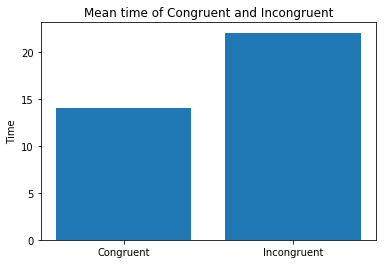

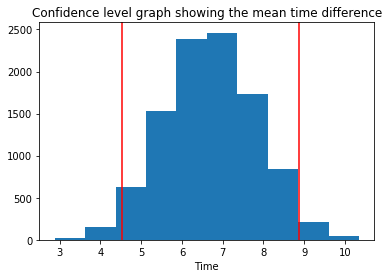

In [4]:
# Build the visualizations here
#importing packages
import matplotlib.pyplot as plt
import seaborn as sns
#bar graph to show the difference between mean time difference
plt.title("Mean time of Congruent and Incongruent")
plt.bar([0,1],[mean_congruent , mean_incongruent], tick_label=['Congruent','Incongruent'])
plt.ylabel('Time')
plt.show()
#histogram to visualize the confidence interval
plt.hist(mean_diff)
plt.axvline(x=low,color='red')
plt.axvline(x=up,color='red')
plt.title("Confidence level graph showing the mean time difference")
plt.xlabel('Time')
plt.show()


Here, the graphs shows the first bar graph shows that the mean time for 'Incongruent' is greater than the 'Congruent'. And, the second grapgh shows the confidence interval.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [6]:
# Perform the statistical test here
#getting sample from the population
sample_data = df.sample(10)
#bootstraping
mean_diff = []
for _ in range(10000):
    boot_sample = sample_data.sample(10, replace=True)
    mean_diff.append(boot_sample.Incongruent.mean()-boot_sample.Congruent.mean())
low, up= np.percentile(mean_diff,2.5), np.percentile(mean_diff,97.5)
#finding p-value
scipy.stats.ttest_ind(df['Congruent'], df['Incongruent'])


Ttest_indResult(statistic=-6.5322505539032285, pvalue=4.5949489622951854e-08)

The confidence level is 95% and the critical value I have taken is 0.05. I have obtained the 'statistic' value as -6.5322505539032285 and the 'p-value' as 4.5949489622951854e-08. The obtained the p-value which approximately 0.001 which is less than 0.05.

Conclusion:
Therefore, I reject the null hypothesis.
Thus, the conclusion I have arrived is, the mean time difference between the 'Incongruent' and the 'Congruent' is greater than zero.

Result:
Yes, the results match up with my expectation.